Jacob Gutierrez

Lareau Lab Mar 21 2024

Ran FFPE data

https://github.com/ventolab/CellphoneDB/blob/master/notebooks/T1_Method2.ipynb


In [1]:
import pandas as pd
import sys
import os

pd.set_option('display.max_columns', 100)

In [2]:
cpdb_file_path = '../data/cellphonedb_db/v5.0.0/cellphonedb.zip'
meta_file_path = '/home/jacobog/brooke_ft/scRNA_combined_atlas/output/cellphonedb_input/ft_combined_meta.tsv'
counts_file_path = '/home/jacobog/brooke_ft/scRNA_combined_atlas/output/cellphonedb_input/ft_combined_atlas/'
#microenvs_file_path = 'data/microenvironment.tsv'
#active_tf_path = 'data/active_TFs.tsv'
out_path = '../output/cellphone_out_ATLAS'


In [3]:
metadata = pd.read_csv(meta_file_path, sep = '\t')
metadata.head(3)
unique_values = metadata['cell_type'].unique()
unique_values

array(['TCell/NK', 'Myofibroblast', 'Secretory-Epithelial',
       'Blood-Endothelial', 'Lymphatic-Endothelial',
       'Ciliated-Epithelial', 'Macrophage', 'Fibroblast',
       'Activated-B-cell', 'Smooth-Muscle', 'CC-Epithelial', 'Mast-Cell',
       'Pericyte', 'B-cell', 'ECM-Fibroblast', 'KRThigh-Epithelial',
       'MSLNhi-Epithelial'], dtype=object)

In [4]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 32,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )



Reading user files...
The following user files were loaded successfully:
/home/jacobog/brooke_ft/scRNA_combined_atlas/output/cellphonedb_input/ft_combined_atlas/
/home/jacobog/brooke_ft/scRNA_combined_atlas/output/cellphonedb_input/ft_combined_meta.tsv
[ ][CORE][26/07/24-21:32:01][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:32 Precision:3
[ ][CORE][26/07/24-21:32:01][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][26/07/24-21:32:14][INFO] Running Real Analysis
[ ][CORE][26/07/24-21:32:14][INFO] Running Statistical Analysis


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [39:07<00:00,  2.35s/it]

[ ][CORE][26/07/24-22:11:22][INFO] Building Pvalues result


[ ][CORE][26/07/24-22:11:23][INFO] Building results
[ ][CORE][26/07/24-22:11:23][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████████████████████████████████████████████████████████████████| 17/17 [00:06<00:00,  2.57it/s]

[ ][CORE][26/07/24-22:11:30][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00, 10.33it/s]


[ ][CORE][26/07/24-22:11:33][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|████████████████████████████████████████████████████████████████████| 289/289 [00:27<00:00, 10.56it/s]


Saved deconvoluted to ../output/cellphone_out_ATLAS/statistical_analysis_deconvoluted_07_26_2024_221201.txt
Saved deconvoluted_percents to ../output/cellphone_out_ATLAS/statistical_analysis_deconvoluted_percents_07_26_2024_221201.txt
Saved means to ../output/cellphone_out_ATLAS/statistical_analysis_means_07_26_2024_221201.txt
Saved pvalues to ../output/cellphone_out_ATLAS/statistical_analysis_pvalues_07_26_2024_221201.txt
Saved significant_means to ../output/cellphone_out_ATLAS/statistical_analysis_significant_means_07_26_2024_221201.txt
Saved interaction_scores to ../output/cellphone_out_ATLAS/statistical_analysis_interaction_scores_07_26_2024_221201.txt


In [5]:
list(cpdb_results.keys())

['deconvoluted',
 'deconvoluted_percents',
 'means',
 'pvalues',
 'significant_means',
 'CellSign_active_interactions',
 'CellSign_active_interactions_deconvoluted',
 'interaction_scores']

In [6]:
#cpdb_results['pvalues'].head(2)
nya=cpdb_results['pvalues']

nya=nya.iloc[:,14:len(nya.columns) ]

#df = nya[nya < 1 ].dropna()
val = .05

df = nya.loc[:,nya.lt(val).any(axis=0)]

df

,Activated-B-cell|B-cell,Activated-B-cell|Blood-Endothelial,Activated-B-cell|CC-Epithelial,Activated-B-cell|Ciliated-Epithelial,Activated-B-cell|ECM-Fibroblast,Activated-B-cell|Fibroblast,Activated-B-cell|KRThigh-Epithelial,Activated-B-cell|Lymphatic-Endothelial,Activated-B-cell|MSLNhi-Epithelial,Activated-B-cell|Macrophage,Activated-B-cell|Mast-Cell,Activated-B-cell|Myofibroblast,Activated-B-cell|Pericyte,Activated-B-cell|Secretory-Epithelial,Activated-B-cell|Smooth-Muscle,Activated-B-cell|TCell/NK,B-cell|Activated-B-cell,B-cell|B-cell,B-cell|Blood-Endothelial,B-cell|CC-Epithelial,B-cell|Ciliated-Epithelial,B-cell|ECM-Fibroblast,B-cell|Fibroblast,B-cell|KRThigh-Epithelial,B-cell|Lymphatic-Endothelial,B-cell|MSLNhi-Epithelial,B-cell|Macrophage,B-cell|Mast-Cell,B-cell|Myofibroblast,B-cell|Pericyte,B-cell|Secretory-Epithelial,B-cell|Smooth-Muscle,B-cell|TCell/NK,Blood-Endothelial|Activated-B-cell,Blood-Endothelial|B-cell,Blood-Endothelial|Blood-Endothelial,Blood-Endothelial|CC-Epithelial,Blood-Endothelial|Ciliated-Epithelial,Blood-Endothelial|ECM-Fibroblast,Blood-Endothelial|Fibroblast,Blood-Endothelial|KRThigh-Epithelial,Blood-Endothelial|Lymphatic-Endothelial,Blood-Endothelial|MSLNhi-Epithelial,Blood-Endothelial|Macrophage,Blood-Endothelial|Mast-Cell,Blood-Endothelial|Myofibroblast,Blood-Endothelial|Pericyte,Blood-Endothelial|Secretory-Epithelial,Blood-Endothelial|Smooth-Muscle,Blood-Endothelial|TCell/NK,...,Secretory-Epithelial|B-cell,Secretory-Epithelial|Blood-Endothelial,Secretory-Epithelial|CC-Epithelial,Secretory-Epithelial|Ciliated-Epithelial,Secretory-Epithelial|ECM-Fibroblast,Secretory-Epithelial|Fibroblast,Secretory-Epithelial|KRThigh-Epithelial,Secretory-Epithelial|Lymphatic-Endothelial,Secretory-Epithelial|MSLNhi-Epithelial,Secretory-Epithelial|Macrophage,Secretory-Epithelial|Mast-Cell,Secretory-Epithelial|Myofibroblast,Secretory-Epithelial|Pericyte,Secretory-Epithelial|Secretory-Epithelial,Secretory-Epithelial|Smooth-Muscle,Secretory-Epithelial|TCell/NK,Smooth-Muscle|Activated-B-cell,Smooth-Muscle|B-cell,Smooth-Muscle|Blood-Endothelial,Smooth-Muscle|CC-Epithelial,Smooth-Muscle|Ciliated-Epithelial,Smooth-Muscle|ECM-Fibroblast,Smooth-Muscle|Fibroblast,Smooth-Muscle|KRThigh-Epithelial,Smooth-Muscle|Lymphatic-Endothelial,Smooth-Muscle|MSLNhi-Epithelial,Smooth-Muscle|Macrophage,Smooth-Muscle|Mast-Cell,Smooth-Muscle|Myofibroblast,Smooth-Muscle|Pericyte,Smooth-Muscle|Secretory-Epithelial,Smooth-Muscle|Smooth-Muscle,Smooth-Muscle|TCell/NK,TCell/NK|Activated-B-cell,TCell/NK|B-cell,TCell/NK|Blood-Endothelial,TCell/NK|CC-Epithelial,TCell/NK|Ciliated-Epithelial,TCell/NK|ECM-Fibroblast,TCell/NK|Fibroblast,TCell/NK|KRThigh-Epithelial,TCell/NK|Lymphatic-Endothelial,TCell/NK|MSLNhi-Epithelial,TCell/NK|Macrophage,TCell/NK|Mast-Cell,TCell/NK|Myofibroblast,TCell/NK|Pericyte,TCell/NK|Secretory-Epithelial,TCell/NK|Smooth-Muscle,TCell/NK|TCell/NK
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [7]:
unique_values = cpdb_results['pvalues']['gene_b'].unique()
unique_values

array([nan, 'KLRG1', 'CDH2', 'FCER2', 'CDH3', 'CDH5', 'CDH6', 'CDH7',
       'CADM1', 'NECTIN3', 'CADM4', 'EPB41L1', 'CD209', 'CEACAM6',
       'CEACAM8', 'SELE', 'CD1D', 'CD8A', 'CEACAM1', 'ADGRG1', 'ADGRG6',
       'DSG2', 'DSC1', 'DSC2', 'DSC3', 'CELSR3', 'NRXN3', 'GJA1', 'GJA5',
       'GJA3', 'GJC1', 'ITGAL', 'SPN', 'CLEC4M', 'JAM3', 'L1CAM', 'CADM3',
       'NECTIN4', 'TIGIT', 'F2R', 'F2RL2', 'F2RL3', 'THBD', 'CD36',
       'CHRM1', 'CHRM2', 'CHRM3', 'CHRM4', 'CHRM5', 'CHRNA1', 'CHRNA7',
       'ADORA1', 'ADORA2A', 'ADORA2B', 'ADORA3', 'ADRA1A', 'ADRA1B',
       'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'ADRB1', 'ADRB2', 'ADRB3',
       'RAMP3', 'MC2R', 'MC3R', 'MC4R', 'MC5R', 'MC1R', 'PTPRS', 'CALCR',
       'CD74', 'FPR2', 'PLXNA4', 'SORL1', 'TNFRSF21', 'PIGR', 'NR3C1',
       'NR3C2', 'AR', 'NR1H4', 'VDR', 'ESR1', 'ESR2', 'GPER1', 'NR1I2',
       'TEK', 'AGTR1', 'AGTR2', 'FPR1', 'FPR3', 'APLNR', 'ABCA1', 'APOBR',
       'CNR1', 'CNR2', 'GPR55', 'NGFR', 'NTRK1', 'SORT1', 'BMPR1A'

In [8]:
cpdb_results['interaction_scores'].head(10)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,Activated-B-cell|Activated-B-cell,Activated-B-cell|B-cell,Activated-B-cell|Blood-Endothelial,Activated-B-cell|CC-Epithelial,Activated-B-cell|Ciliated-Epithelial,Activated-B-cell|ECM-Fibroblast,Activated-B-cell|Fibroblast,Activated-B-cell|KRThigh-Epithelial,Activated-B-cell|Lymphatic-Endothelial,Activated-B-cell|MSLNhi-Epithelial,Activated-B-cell|Macrophage,Activated-B-cell|Mast-Cell,Activated-B-cell|Myofibroblast,Activated-B-cell|Pericyte,Activated-B-cell|Secretory-Epithelial,Activated-B-cell|Smooth-Muscle,Activated-B-cell|TCell/NK,B-cell|Activated-B-cell,B-cell|B-cell,B-cell|Blood-Endothelial,B-cell|CC-Epithelial,B-cell|Ciliated-Epithelial,B-cell|ECM-Fibroblast,B-cell|Fibroblast,B-cell|KRThigh-Epithelial,B-cell|Lymphatic-Endothelial,B-cell|MSLNhi-Epithelial,B-cell|Macrophage,B-cell|Mast-Cell,B-cell|Myofibroblast,B-cell|Pericyte,B-cell|Secretory-Epithelial,B-cell|Smooth-Muscle,B-cell|TCell/NK,Blood-Endothelial|Activated-B-cell,Blood-Endothelial|B-cell,Blood-Endothelial|Blood-Endothelial,...,Secretory-Epithelial|B-cell,Secretory-Epithelial|Blood-Endothelial,Secretory-Epithelial|CC-Epithelial,Secretory-Epithelial|Ciliated-Epithelial,Secretory-Epithelial|ECM-Fibroblast,Secretory-Epithelial|Fibroblast,Secretory-Epithelial|KRThigh-Epithelial,Secretory-Epithelial|Lymphatic-Endothelial,Secretory-Epithelial|MSLNhi-Epithelial,Secretory-Epithelial|Macrophage,Secretory-Epithelial|Mast-Cell,Secretory-Epithelial|Myofibroblast,Secretory-Epithelial|Pericyte,Secretory-Epithelial|Secretory-Epithelial,Secretory-Epithelial|Smooth-Muscle,Secretory-Epithelial|TCell/NK,Smooth-Muscle|Activated-B-cell,Smooth-Muscle|B-cell,Smooth-Muscle|Blood-Endothelial,Smooth-Muscle|CC-Epithelial,Smooth-Muscle|Ciliated-Epithelial,Smooth-Muscle|ECM-Fibroblast,Smooth-Muscle|Fibroblast,Smooth-Muscle|KRThigh-Epithelial,Smooth-Muscle|Lymphatic-Endothelial,Smooth-Muscle|MSLNhi-Epithelial,Smooth-Muscle|Macrophage,Smooth-Muscle|Mast-Cell,Smooth-Muscle|Myofibroblast,Smooth-Muscle|Pericyte,Smooth-Muscle|Secretory-Epithelial,Smooth-Muscle|Smooth-Muscle,Smooth-Muscle|TCell/NK,TCell/NK|Activated-B-cell,TCell/NK|B-cell,TCell/NK|Blood-Endothelial,TCell/NK|CC-Epithelial,TCell/NK|Ciliated-Epithelial,TCell/NK|ECM-Fibroblast,TCell/NK|Fibroblast,TCell/NK|KRThigh-Epithelial,TCell/NK|Lymphatic-Endothelial,TCell/NK|MSLNhi-Epithelial,TCell/NK|Macrophage,TCell/NK|Mast-Cell,TCell/NK|Myofibroblast,TCell/NK|Pericyte,TCell/NK|Secretory-Epithelial,TCell/NK|Smooth-Muscle,TCell/NK|TCell/NK
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,True,Adhesion-Adhesion,Adhesion by Cadherin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,53.625,33.828,31.504,60.202,0.0,79.291,0.0,27.775,0.0,0.0,0.0,0.0,39.044,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CPI-SC0C8B7BCBB,COL11A1_integrin_a2b1_complex,simple:P12107,complex:integrin_a2b1_complex,COL11A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [9]:
cpdb_results['CellSign_active_interactions']

pandas.core.frame.DataFrame

In [10]:
cpdb_results['deconvoluted'].head(2)

,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,gene,Activated-B-cell,B-cell,Blood-Endothelial,CC-Epithelial,Ciliated-Epithelial,ECM-Fibroblast,Fibroblast,KRThigh-Epithelial,Lymphatic-Endothelial,MSLNhi-Epithelial,Macrophage,Mast-Cell,Myofibroblast,Pericyte,Secretory-Epithelial,Smooth-Muscle,TCell/NK
multidata_id,,,,,,,,,,,,,,,,,,,,,,,,
1355,UBASH3B,Q8TF42,True,UBS3B_HUMAN,Dehydroepiandrosterone_bySTS,CPI-CS09B8977D7,UBASH3B,0.023,0.005,0.053,0.064,0.003,0.017,0.009,0.012,0.003,0.0,0.12,0.018,0.009,0.006,0.006,0.003,0.039
1355,UBASH3B,Q8TF42,True,UBS3B_HUMAN,Dehydroepiandrosterone_bySTS,CPI-CS05760BB78,UBASH3B,0.023,0.005,0.053,0.064,0.003,0.017,0.009,0.012,0.003,0.0,0.12,0.018,0.009,0.006,0.006,0.003,0.039


In [11]:
cpdb_results['significant_means']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,rank,Activated-B-cell|Activated-B-cell,Activated-B-cell|B-cell,Activated-B-cell|Blood-Endothelial,Activated-B-cell|CC-Epithelial,Activated-B-cell|Ciliated-Epithelial,Activated-B-cell|ECM-Fibroblast,Activated-B-cell|Fibroblast,Activated-B-cell|KRThigh-Epithelial,Activated-B-cell|Lymphatic-Endothelial,Activated-B-cell|MSLNhi-Epithelial,Activated-B-cell|Macrophage,Activated-B-cell|Mast-Cell,Activated-B-cell|Myofibroblast,Activated-B-cell|Pericyte,Activated-B-cell|Secretory-Epithelial,Activated-B-cell|Smooth-Muscle,Activated-B-cell|TCell/NK,B-cell|Activated-B-cell,B-cell|B-cell,B-cell|Blood-Endothelial,B-cell|CC-Epithelial,B-cell|Ciliated-Epithelial,B-cell|ECM-Fibroblast,B-cell|Fibroblast,B-cell|KRThigh-Epithelial,B-cell|Lymphatic-Endothelial,B-cell|MSLNhi-Epithelial,B-cell|Macrophage,B-cell|Mast-Cell,B-cell|Myofibroblast,B-cell|Pericyte,B-cell|Secretory-Epithelial,B-cell|Smooth-Muscle,B-cell|TCell/NK,Blood-Endothelial|Activated-B-cell,Blood-Endothelial|B-cell,...,Secretory-Epithelial|B-cell,Secretory-Epithelial|Blood-Endothelial,Secretory-Epithelial|CC-Epithelial,Secretory-Epithelial|Ciliated-Epithelial,Secretory-Epithelial|ECM-Fibroblast,Secretory-Epithelial|Fibroblast,Secretory-Epithelial|KRThigh-Epithelial,Secretory-Epithelial|Lymphatic-Endothelial,Secretory-Epithelial|MSLNhi-Epithelial,Secretory-Epithelial|Macrophage,Secretory-Epithelial|Mast-Cell,Secretory-Epithelial|Myofibroblast,Secretory-Epithelial|Pericyte,Secretory-Epithelial|Secretory-Epithelial,Secretory-Epithelial|Smooth-Muscle,Secretory-Epithelial|TCell/NK,Smooth-Muscle|Activated-B-cell,Smooth-Muscle|B-cell,Smooth-Muscle|Blood-Endothelial,Smooth-Muscle|CC-Epithelial,Smooth-Muscle|Ciliated-Epithelial,Smooth-Muscle|ECM-Fibroblast,Smooth-Muscle|Fibroblast,Smooth-Muscle|KRThigh-Epithelial,Smooth-Muscle|Lymphatic-Endothelial,Smooth-Muscle|MSLNhi-Epithelial,Smooth-Muscle|Macrophage,Smooth-Muscle|Mast-Cell,Smooth-Muscle|Myofibroblast,Smooth-Muscle|Pericyte,Smooth-Muscle|Secretory-Epithelial,Smooth-Muscle|Smooth-Muscle,Smooth-Muscle|TCell/NK,TCell/NK|Activated-B-cell,TCell/NK|B-cell,TCell/NK|Blood-Endothelial,TCell/NK|CC-Epithelial,TCell/NK|Ciliated-Epithelial,TCell/NK|ECM-Fibroblast,TCell/NK|Fibroblast,TCell/NK|KRThigh-Epithelial,TCell/NK|Lymphatic-Endothelial,TCell/NK|MSLNhi-Epithelial,TCell/NK|Macrophage,TCell/NK|Mast-Cell,TCell/NK|Myofibroblast,TCell/NK|Pericyte,TCell/NK|Secretory-Epithelial,TCell/NK|Smooth-Muscle,TCell/NK|TCell/NK
338,CPI-SS0710B1B3A,CTSG_F2RL3,simple:P08311,simple:Q96RI0,CTSG,F2RL3,True,False,True,curated,False,Ligand-Receptor,Signaling by Cathepsin,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,CPI-SC0D05B755E,BMP6_BMR1A_AVR2B,simple:P22004,complex:BMR1A_AVR2B,BMP6,NaN,True,False,True,curated,False,Ligand-Receptor,Signaling by BMP,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,CPI-SS02CCE14A7,ADCYAP1_VIPR2,simple:P18509,simple:P41587,ADCYAP1,VIPR2,True,False,True,curated,False,Ligand-Receptor,Signaling by Pituitary adenylate,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [14]:
from cellphonedb.utils import search_utils

search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['All'],  # List of cells 1, will be paired to cells 2 (list or 'All').
    query_cell_types_2 = ['All'],     # List of cells 2, will be paired to cells 1 (list or 'All').
    significant_means = cpdb_results['significant_means'],          # significant_means file generated by CellphoneDB.
    deconvoluted = cpdb_results['deconvoluted'],                    # devonvoluted file generated by CellphoneDB.                                    # minimum score that an interaction must have to be filtered.
    separator = '|',                                                # separator (default: |) employed to split cells (cellA|cellB).
    long_format = True                                           # converts the output into a wide table, removing non-significant interactions
)

search_results.head()

,interacting_pair,partner_a,partner_b,gene_a,gene_b,directionality,classification,interacting_cells,significant_mean


In [16]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

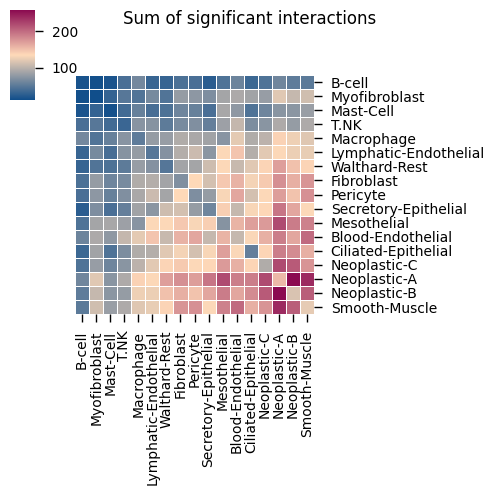

In [24]:


kpy.plot_cpdb_heatmap(pvals = cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (5, 5),
                      title = "Sum of significant interactions")




In [18]:
cpdb_results['pvalues']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,B-cell|B-cell,B-cell|Blood-Endothelial,B-cell|Ciliated-Epithelial,B-cell|Fibroblast,B-cell|Lymphatic-Endothelial,B-cell|Macrophage,B-cell|Mast-Cell,B-cell|Mesothelial,B-cell|Myofibroblast,B-cell|Neoplastic-A,B-cell|Neoplastic-B,B-cell|Neoplastic-C,B-cell|Pericyte,B-cell|Secretory-Epithelial,B-cell|Smooth-Muscle,B-cell|T.NK,B-cell|Walthard-Rest,Blood-Endothelial|B-cell,Blood-Endothelial|Blood-Endothelial,Blood-Endothelial|Ciliated-Epithelial,Blood-Endothelial|Fibroblast,Blood-Endothelial|Lymphatic-Endothelial,Blood-Endothelial|Macrophage,Blood-Endothelial|Mast-Cell,Blood-Endothelial|Mesothelial,Blood-Endothelial|Myofibroblast,Blood-Endothelial|Neoplastic-A,Blood-Endothelial|Neoplastic-B,Blood-Endothelial|Neoplastic-C,Blood-Endothelial|Pericyte,Blood-Endothelial|Secretory-Epithelial,Blood-Endothelial|Smooth-Muscle,Blood-Endothelial|T.NK,Blood-Endothelial|Walthard-Rest,Ciliated-Epithelial|B-cell,Ciliated-Epithelial|Blood-Endothelial,Ciliated-Epithelial|Ciliated-Epithelial,...,Smooth-Muscle|Blood-Endothelial,Smooth-Muscle|Ciliated-Epithelial,Smooth-Muscle|Fibroblast,Smooth-Muscle|Lymphatic-Endothelial,Smooth-Muscle|Macrophage,Smooth-Muscle|Mast-Cell,Smooth-Muscle|Mesothelial,Smooth-Muscle|Myofibroblast,Smooth-Muscle|Neoplastic-A,Smooth-Muscle|Neoplastic-B,Smooth-Muscle|Neoplastic-C,Smooth-Muscle|Pericyte,Smooth-Muscle|Secretory-Epithelial,Smooth-Muscle|Smooth-Muscle,Smooth-Muscle|T.NK,Smooth-Muscle|Walthard-Rest,T.NK|B-cell,T.NK|Blood-Endothelial,T.NK|Ciliated-Epithelial,T.NK|Fibroblast,T.NK|Lymphatic-Endothelial,T.NK|Macrophage,T.NK|Mast-Cell,T.NK|Mesothelial,T.NK|Myofibroblast,T.NK|Neoplastic-A,T.NK|Neoplastic-B,T.NK|Neoplastic-C,T.NK|Pericyte,T.NK|Secretory-Epithelial,T.NK|Smooth-Muscle,T.NK|T.NK,T.NK|Walthard-Rest,Walthard-Rest|B-cell,Walthard-Rest|Blood-Endothelial,Walthard-Rest|Ciliated-Epithelial,Walthard-Rest|Fibroblast,Walthard-Rest|Lymphatic-Endothelial,Walthard-Rest|Macrophage,Walthard-Rest|Mast-Cell,Walthard-Rest|Mesothelial,Walthard-Rest|Myofibroblast,Walthard-Rest|Neoplastic-A,Walthard-Rest|Neoplastic-B,Walthard-Rest|Neoplastic-C,Walthard-Rest|Pericyte,Walthard-Rest|Secretory-Epithelial,Walthard-Rest|Smooth-Muscle,Walthard-Rest|T.NK,Walthard-Rest|Walthard-Rest
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,True,Adhesion-Adhesion,Adhesion by Cadherin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,CPI-SC0C8B7BCBB,COL11A1_integrin_a2b1_complex,simple:P12107,complex:integrin_a2b1_complex,COL11A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,CPI-SC0D3C12C3F,COL11A2_integrin_a2b1_